<a href="https://colab.research.google.com/github/zerobbang/study_colab/blob/main/ch4_2_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률 경사 하강법 (SGD Classifier)

 확률 경사 하강법은 간단히 말해서 랜덤하게 샘플 데이터 하나를 뽑아서 최적의 점을 찾아가는 방법이다.

- 데이터 준비

In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


입력 데이터와 타겟 데이터를 numpy 배열로 변환한다.

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

- 훈련 세트와 테스트 세트

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((119, 5), (40, 5), (119,), (40,))

- 표준화 처리 
  
  꼭 훈련 세트에서 학습한 통계값으로 테스트 세트도 변환

  키워드 : Data Leakage 방지

In [4]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# 훈련 세트로 학습
ss.fit(train_input,train_target)

# 학습한 변환기로 훈련 데이터와 학습 데이터 표준화 작업
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

- **모델 학습 - SGDClassifier**

  SGDClassifier -> 2개의 매개 변수 지정

  -   loss = log  = 로지스틱 손실 함수 지정  (기본값 : hinge)

  -   max_iter = 에포크 횟수 지정

In [5]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log',max_iter = 40, random_state = 42)

매개변수 값을 dictioncary 형태로 추가하는 방법도 있지만 지양하도록 한다.

훈련 데이터로 학습하고 전처리한 훈려 데이터와 테스트 데이터 테스트 점수 확인

In [6]:
# 모델 학습
sc.fit(train_scaled, train_target)

# 테스트 점수 확인
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8403361344537815
0.8


-> 예상보다 좋은 점수는 아니니 에포크를 횟수를 늘려보자


- **에포크** - 재반복 / 적절한 에포크 숫자 찾자

   (에포크 끝난 곳에서 다시 에포크 반복)

리스트를 이용해서 에포크 횟수를 늘린다.

In [7]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score=[]
test_score=[]
classes = np.unique(train_target)

In [8]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

300번 반복한 훈련 데이터 테스트 점수와 테스트 데이터 테스트 점수를 확인해본다.

In [9]:
print(train_score[:5])
print(test_score[:5])

[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.65, 0.55, 0.575, 0.7, 0.7]


- 상위 5위까지 표시해보자.

In [10]:
train_score.sort(reverse=True)
test_score.sort(reverse=True)
print(train_score[:5])
print(test_score[:5])

[0.9663865546218487, 0.9663865546218487, 0.9663865546218487, 0.9663865546218487, 0.9663865546218487]
[0.925, 0.925, 0.925, 0.925, 0.925]


상위 값을 보기 위해 정렬 했기 때문에 시각화하기 전 다시 정렬한다.

In [11]:
train_score.sort()
test_score.sort()

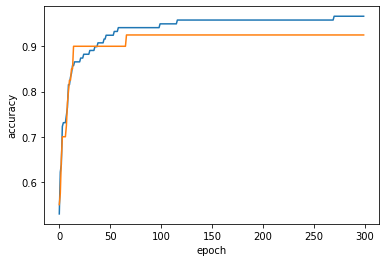

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')
fig.show()

주황선 :  테스트 세트

파란선 : 훈련 세트

극 왼쪽은 훈련 세트 < 테스트 세트 이므로 과소적합, 오른쪽은 훈련 세트 > 테스트 세트 로 과대 적합

-> 적절한 에포크값 : 100

- 개선 (에포크 값 100 설정)

In [13]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


그 동안 추출한 테스트 점수 중에서 제일 좋은 점수이다. (성능이 업그레이드)